# Logistic Regression  

*  Classification

* SGD_Classifier

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
#----------------------------------------------------

#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score , recall_score ,precision_score
from sklearn.metrics import roc_auc_score , roc_curve , auc, zero_one_loss , confusion_matrix
from sklearn.metrics import precision_recall_fscore_support , precision_recall_curve ,classification_report



In [8]:
 X , y = load_breast_cancer(return_X_y = True)
print(f"X_data :: \n {X[:5]}\n======\nThe X_shap :: {X.shape}\n======\nThe y_data :: \n {y[:30]}\n=====\n\
The y_Shap :: {y.shape}")

X_data :: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.8

In [28]:
# Split data into Training and testing data

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size =0.33 , random_state =44 , shuffle = True)

print(f"The X_train :: \n {X_train}\n=====The X_test ::\n {X_test}\n====The y_train :: \n {y_train}\n===\n\
The y_Test :: {y_test}\n====\nThe X_train_shap :: {X_train.shape}\n====\nThe X_test_shap :: {X_test.shape}\
\n=========\nThe y_train_shap :: {y_train.shape}\n=====\nThe y_test :: {y_test.shape}")

The X_train :: 
 [[1.245e+01 1.570e+01 8.257e+01 ... 1.741e-01 3.985e-01 1.244e-01]
 [1.152e+01 1.875e+01 7.334e+01 ... 6.316e-02 3.306e-01 7.036e-02]
 [1.940e+01 1.818e+01 1.272e+02 ... 2.252e-01 3.590e-01 7.787e-02]
 ...
 [1.218e+01 1.784e+01 7.779e+01 ... 5.882e-02 2.227e-01 7.376e-02]
 [1.108e+01 1.471e+01 7.021e+01 ... 4.306e-02 1.902e-01 7.313e-02]
 [1.116e+01 2.141e+01 7.095e+01 ... 4.306e-02 2.976e-01 7.123e-02]]
=====The X_test ::
 [[1.328e+01 2.028e+01 8.732e+01 ... 1.492e-01 3.739e-01 1.027e-01]
 [2.059e+01 2.124e+01 1.378e+02 ... 2.113e-01 2.480e-01 8.999e-02]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]
 ...
 [1.231e+01 1.652e+01 7.919e+01 ... 8.660e-02 2.618e-01 7.609e-02]
 [1.422e+01 2.785e+01 9.255e+01 ... 8.219e-02 1.890e-01 7.796e-02]
 [1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]]
====The y_train :: 
 [0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 

In [33]:
# Apply logistic Rgression Model

Logistic_Regression_Model = LogisticRegression(penalty="l2" , C = 1.0  ,max_iter=10000 , solver ="sag" , random_state = 33)
Logistic_Regression_Model.fit(X_train , y_train)

# Attributies in Logistic Model

Model_Coef = Logistic_Regression_Model.coef_
Model_intercept = Logistic_Regression_Model.intercept_
Model_Training_Score = Logistic_Regression_Model.score(X_train , y_train)
Model_Testing_Score = Logistic_Regression_Model.score(X_test , y_test)
Model_Classes = Logistic_Regression_Model.classes_
Model_Iterations = Logistic_Regression_Model.n_iter_

# 
y_pred = Logistic_Regression_Model.predict(X_test)
y_Prob = Logistic_Regression_Model.predict_proba(X_test)

Cofusion_Matrix = confusion_matrix(y_test , y_pred)


In [35]:
print(f"The Model_Coefficient :: \n{Model_Coef}\n=======\nThe Model_intercept :: {Model_intercept}\n====\n\
The Model_Classes :: {Model_Classes}\n=======\nThe Num Iters :: {Model_Iterations}\n====\n\
The Model_Training_Score :: {Model_Training_Score}\n********\nThe Model_Testing_Score ::\
{Model_Testing_Score}\n**********\nThe Cofussion Matrix ::\n {Cofusion_Matrix}\n**********\n\
The y_prediction :: {y_pred[:30]}\n=====\nThe y_prediction_Probability :: {y_Prob[:30]}")

The Model_Coefficient :: 
[[ 2.26648378e-02 -6.51131975e-03  9.55235474e-02  1.44278749e-02
   1.12200096e-05 -1.19544802e-03 -1.83553967e-03 -7.02346975e-04
  -9.97990209e-06  7.03339540e-05  3.95510499e-04 -1.76102813e-04
  -2.02795277e-03 -1.33636111e-02 -3.54766774e-06 -3.41663168e-04
  -4.35071770e-04 -9.03408323e-05 -5.91909159e-05 -2.89571181e-05
   2.37026798e-02 -2.93306025e-02  6.14467404e-02 -2.92972153e-02
  -1.10243406e-04 -4.20192697e-03 -5.40188660e-03 -1.36586287e-03
  -5.83331422e-04 -2.30383068e-04]]
The Model_intercept :: [0.00337614]
====
The Model_Classes :: [0 1]
The Num Iters :: [4250]
====
The Model_Training_Score :: 0.9028871391076115
********
The Model_Testing_Score ::0.9574468085106383
**********
The Cofussion Matrix ::
 [[ 63   5]
 [  3 117]]
**********
The y_prediction :: [0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1]
=====
The y_prediction_Probability :: [[9.83481567e-01 1.65184325e-02]
 [9.99967990e-01 3.20098384e-05]
 [8.00860159e-02 9.199

* We Must chage values of hypper prameter to get high efficiency from model

In [36]:
#

# Apply logistic Rgression Model

Logistic_Regression_Model = LogisticRegression(penalty="l1" , C = 1.0  ,max_iter=10000 , solver ="liblinear" , random_state = 33)
Logistic_Regression_Model.fit(X_train , y_train)

# Attributies in Logistic Model

Model_Coef = Logistic_Regression_Model.coef_
Model_intercept = Logistic_Regression_Model.intercept_
Model_Training_Score = Logistic_Regression_Model.score(X_train , y_train)
Model_Testing_Score = Logistic_Regression_Model.score(X_test , y_test)
Model_Classes = Logistic_Regression_Model.classes_
Model_Iterations = Logistic_Regression_Model.n_iter_

# 
y_pred = Logistic_Regression_Model.predict(X_test)
y_Prob = Logistic_Regression_Model.predict_proba(X_test)

Cofusion_Matrix = confusion_matrix(y_test , y_pred)


In [37]:
print(f"The Model_Coefficient :: \n{Model_Coef}\n=======\nThe Model_intercept :: {Model_intercept}\n====\n\
The Model_Classes :: {Model_Classes}\n=======\nThe Num Iters :: {Model_Iterations}\n====\n\
The Model_Training_Score :: {Model_Training_Score}\n********\nThe Model_Testing_Score ::\
{Model_Testing_Score}\n**********\nThe Cofussion Matrix ::\n {Cofusion_Matrix}\n**********\n\
The y_prediction :: {y_pred[:30]}\n=====\nThe y_prediction_Probability :: {y_Prob[:30]}")

The Model_Coefficient :: 
[[ 5.3412544   0.12226688 -0.35840175 -0.01466847  0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.0361001   0.          0.          0.          0.
   0.          0.          0.         -0.31380628 -0.09019207 -0.01943753
   0.          0.         -2.6891123   0.          0.          0.        ]]
The Model_intercept :: [0.]
====
The Model_Classes :: [0 1]
The Num Iters :: [86]
====
The Model_Training_Score :: 0.958005249343832
********
The Model_Testing_Score ::0.9680851063829787
**********
The Cofussion Matrix ::
 [[ 65   3]
 [  3 117]]
**********
The y_prediction :: [0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1]
=====
The y_prediction_Probability :: [[9.90231675e-01 9.76832499e-03]
 [9.99999994e-01 6.42998594e-09]
 [2.31664921e-02 9.76833508e-01]
 [1.00000000e+00 1.91528325e-10]
 [3.13286020e-01 6.86713980e-01]
 [9.54362301e-02 9.04563770e-01]
 [2.38207666e-04 9.99761792e-01]
 [7.74877729e-02 9

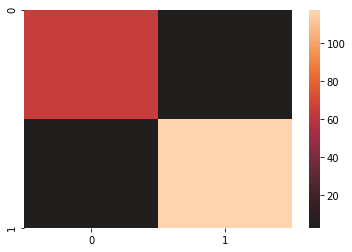

In [39]:
# Blck color less numbers and brightness is large value

sns.heatmap(Cofusion_Matrix , center=True)
plt.show()

# present odel Accuracy

In [45]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
# return Numerical value
AccScore1 = accuracy_score(y_test, y_pred, normalize=False)
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
# return Precentage Value
AccScore2 = accuracy_score(y_test, y_pred, normalize=True)



#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples


#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples


#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples



#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples


#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)




#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)


#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)


#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)


#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples



#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 

In [46]:
print(f"The_AccScore1_value :: {AccScore1}\n=====\nThe_AccScore2_precentile :: {AccScore2}\n=====\n\
The F1Score :: {F1Score}\n=====\nThe RecallScore :: {RecallScore}\n=====\nThe PrecisionScore :: \
{PrecisionScore}\n===\nThe PrecisionRecallScore :: {PrecisionRecallScore}\n======\nThe PrecisionValue\
:: {PrecisionValue} ,, The RecallValue :: {RecallValue} ,, The ThresholdsValue :: {ThresholdsValue}\n\
=============\nThe fprValue2 :: {fprValue2} ,, The tprValue2 :: {tprValue2} ,, The thresholdsValue2 ::\
{thresholdsValue2}\n=====\n The fprValue ::{fprValue} ,, The tprValue :: {tprValue} ,, The thresholdsValue ::\
{thresholdsValue}\n========\nThe AUCValue :: {AUCValue}\n====\nThe ZeroOneLossValue ::\
{ZeroOneLossValue}\n======\nThe ROCAUCScore :: {ROCAUCScore}\n=======\n The Classification Report :: \
{ClassificationReport}")

The_AccScore1_value :: 182
=====
The_AccScore2_precentile :: 0.9680851063829787
=====
The F1Score :: 0.9680851063829787
=====
The RecallScore :: 0.9680851063829787
=====
The PrecisionScore :: 0.9680851063829787
===
The PrecisionRecallScore :: (0.9680851063829787, 0.9680851063829787, 0.9680851063829787, None)
The PrecisionValue:: [0.63829787 0.975      1.        ] ,, The RecallValue :: [1.    0.975 0.   ] ,, The ThresholdsValue :: [0 1]
The fprValue2 :: [0.         0.04411765 1.        ] ,, The tprValue2 :: [0.    0.975 1.   ] ,, The thresholdsValue2 ::[2 1 0]
=====
 The fprValue ::[0.         0.04411765 1.        ] ,, The tprValue :: [0.    0.975 1.   ] ,, The thresholdsValue ::[2 1 0]
The AUCValue :: 0.9654411764705882
====
The ZeroOneLossValue ::6
The ROCAUCScore :: 0.9654411764705882
 The Classification Report ::               precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.97      0.97      0.97       120

    accu